# Numpy Functions and Computations

---

**Specific Examples for Each Feature:**

1. **ufuncs:** Imagine you're working in meteorology and you have a numpy array of temperatures in Fahrenheit. You could use a ufunc to convert all these values to Celsius.

2. **Aggregation Functions:** Suppose you're analyzing exam scores for students. You might use the `mean` function to find the average score, `std` to see the variability, and `max` or `min` to find the highest and lowest scores.

3. **Broadcasting:** Let's say you have a dataset with various products' sales over a 12 month period (12 values per product). If you wanted to add a bonus sale (like 10 extra sales) for each product in December, you could use broadcasting to add this value only to the December column.

4. **Linear Algebra Functions:** In machine learning, when training a linear regression model, you might need to find the inverse of a matrix to compute the model's weights. Here, the `linalg.inv` function would be beneficial.

---

In [1]:
import numpy as np


**1. Universal Functions (ufuncs)**

Universal functions are element-wise operations on arrays.
They are "universal" because they can operate on ndarrays of any shape and size.

**Use Cases:**
- **Scientific Computations:** When doing element-wise computations on large datasets, such as transforming units, ufuncs offer an efficient way.
- **Data Cleaning:** Adjusting or normalizing data before further processing or analysis. For example, applying a logarithmic transformation to skewed data.
- **Graphics and Animations:** Computing frames or transformation matrices in graphics rendering.

In [2]:
# Basic mathematical functions
a = np.array([1, 2, 3, 4])
b = np.array([4, 3, 2, 1])

# Element-wise addition
print(np.add(a, b))  # [5 5 5 5]

# Element-wise subtraction
print(np.subtract(a, b))  # [-3 -1 1 3]

# Element-wise multiplication
print(np.multiply(a, b))  # [4 6 6 4]

# Element-wise division
print(np.divide(a, b))  # [0.25 0.66666667 1.5 4. ]

# Analogous to the operations above, ufuncs can also handle complex operations.
print(np.sin(a))  # Sine of each element
print(np.exp(b))  # Exponential of each element


[5 5 5 5]
[-3 -1  1  3]
[4 6 6 4]
[0.25       0.66666667 1.5        4.        ]
[ 0.84147098  0.90929743  0.14112001 -0.7568025 ]
[54.59815003 20.08553692  7.3890561   2.71828183]


**2. Aggregation Functions**

Sometimes, you want to compute something over the entire array.

**Use Cases:**
- **Statistical Analysis:** When you need a quick overview of a dataset's properties. For instance, `mean` and `std` can give insights about data distribution.
- **Data Reduction:** Condensing large datasets to a single value, like summing up monthly sales to get a yearly value.
- **Image Processing:** For operations like finding the brightness (`mean`) or contrast (`std`) of an image.

In [3]:
# Sum of all elements
print(np.sum(a))  # 10

# Mean (average) of all elements
print(np.mean(a))  # 2.5

# Standard deviation
print(np.std(b))  # 1.118033988749895

# Minimum and Maximum
print(np.min(a), np.max(b))  # 1 4

# Aggregation functions can also be used along specific axes.
matrix = np.array([[1, 2], [3, 4], [5, 6]])

# Sum along the first axis (rows)
print(np.sum(matrix, axis=0))  # [ 9 12]

# Sum along the second axis (columns)
print(np.sum(matrix, axis=1))  # [ 3  7 11]

# Note: Setting axis helps when dealing with multidimensional data. Imagine collapsing a dimension by squishing a box.


10
2.5
1.118033988749895
1 4
[ 9 12]
[ 3  7 11]


**3. Broadcasting Rules**

Broadcasting allows numpy to work with arrays of different shapes when performing arithmetic operations.

**Use Cases:**
- **Data Normalization:** Subtracting the mean (a scalar) from all elements in an array or dividing by the standard deviation.
- **Applying a Common Operation:** Like adding a constant value to all elements in an array or multiplying by a scalar.
- **Combining Datasets:** Such as adding a row vector of biases to every row of a matrix in machine learning models.

In [4]:
x = np.array([1, 2, 3])
y = 5

# This works because of broadcasting: the scalar y is broadcasted to match the shape of x.
print(x * y)  # [ 5 10 15]

# Another example: Adding a vector to a matrix
z = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x + z)  # The vector x is added to each row of matrix z.

# Think of broadcasting as "stretching" the smaller array to match the shape of the larger array.


[ 5 10 15]
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


**4. Linear Algebra Functions**

Linear algebra is a foundational field of mathematics and is crucial in many areas of science and engineering.

**Use Cases:**
- **Machine Learning:** For operations like fitting linear regression models, eigen decompositions, or Singular Value Decomposition (SVD).
- **Graphics and Game Development:** Transformations like rotation, scaling, and translation are often represented as matrix multiplications.
- **Physics Simulations:** Many problems in physics, especially quantum mechanics, rely heavily on linear algebra.
- **Optimization Problems:** Many algorithms, especially in operations research, rely on solving systems of linear equations, finding inverses, etc.

In [5]:
# Dot product
dot_result = np.dot(a, b)
print(dot_result)

# Matrix multiplication (for Python 3.5+)
result = z @ z  # Matrix product
print(result)

# Inverse and determinant
matrix_square = np.array([[1, 2], [3, 4]])
inv_matrix = np.linalg.inv(matrix_square)
det_matrix = np.linalg.det(matrix_square)
print(inv_matrix)
print(det_matrix)

# Note: Linear algebra functions often require square matrices. Ensure data compatibility before operations.


20
[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]
[[-2.   1. ]
 [ 1.5 -0.5]]
-2.0000000000000004


---

# Advanced Numpy Techniques

---

**1. Handling Missing Data**

In real-world datasets, missing data is common. This could be due to many reasons like data entry errors, sensor malfunction, or simply no data availability.

**Numpy's `nan`** is used to represent missing data.

**Use Cases:**
- **Data Cleaning:** When preparing data for analysis or machine learning, handling missing data is often the first step. Ignoring missing values might introduce bias or inaccuracies.
- **Sensory Data:** Sometimes, sensors collecting data might fail intermittently, producing gaps in the data.
  
**Specific Situations:**
- You have survey results where not all participants answered every question.
- Financial time-series data where certain dates might be missing due to holidays or system downtime.

In [6]:
import numpy as np

# Create an array with missing data
data = np.array([1, 2, np.nan, 4, 5])

# Check if there are NaN values in the array
print(np.isnan(data))  # [False False  True False False]


[False False  True False False]


You can use boolean indexing to handle or replace `nan` values.

In [7]:
# Replacing NaN with the mean of the other elements
mean_val = np.nanmean(data)  # Compute mean while ignoring NaN
data[np.isnan(data)] = mean_val
print(data)  # [1. 2. 3. 4. 5.]


[1. 2. 3. 4. 5.]


**2. File I/O with Numpy**

Numpy provides robust functions to save and load data. 

**Use Cases:**
- **Persistent Storage:** Store intermediate results or preprocessed datasets, so you don't have to re-run computations every time.
- **Data Sharing:** Share datasets with colleagues or for online distribution.
  
**Specific Situations:**
- You have a CSV file with numerical data that you want to analyze using Numpy.
- You want to distribute a pre-trained model's weights for other researchers to use.

**Text Files:** `loadtxt` and `savetxt`

In [8]:
# Saving array to a text file
arr = np.arange(10).reshape(5, 2)
np.savetxt('array_data.txt', arr, delimiter=',')

# Loading data from a text file
loaded_data = np.loadtxt('array_data.txt', delimiter=',')
print(loaded_data)


[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]


**Binary Files:** `save` and `load` - Useful for large datasets.

In [9]:
# Saving to a binary file (.npy format)
np.save('binary_data.npy', arr)

# Loading from a binary file
loaded_binary_data = np.load('binary_data.npy')
print(loaded_binary_data)


[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


**3. Memory Mapped Files**

Consider a scenario where you have an enormous dataset, too large to fit into memory. Memory-mapped files allow you to work with this data as if it's an array in memory.

**Use Cases:**
- **Handling Large Datasets:** When data is too big to fit into memory but needs to be processed as if it's an array.
- **Streaming Data:** For applications that need to process data in chunks, like some forms of video processing.
  
**Specific Situations:**
- You have a 100 GB dataset but only 16 GB of RAM, and you want to apply transformations to the dataset.
- Working with high-resolution medical imagery, where individual images might be larger than available memory.

In [10]:
# Creating a memory-mapped array
mmapped_array = np.memmap('mmapped_file.dat', dtype='float32', mode='w+', shape=(10000, 10000))

# Let's use it as if it's a regular array
mmapped_array[9999, 9999] = 123.456

# You can also slice and manipulate it like a regular array
print(mmapped_array[9999, 9999])  # 123.456


123.456


*Analogy*: Imagine you have a vast library, but your table can only fit a few books at a time. Memory mapping is like having a magical table where any book you think of instantly appears on the table, even though the library remains unchanged.

**4. Random Number Generation**

Numpy's `random` module is powerful and versatile for generating random numbers.

**Use Cases:**
- **Simulations:** Simulating experiments, financial scenarios, or any Monte Carlo method.
- **Initializing Parameters:** In machine learning, model parameters are often initialized with random values.
- **Data Augmentation:** Generating synthetic data or adding noise for robustness in training models.
  
**Specific Situations:**
- You're developing a game and need random events or outcomes.
- In neural network training, where weights of neurons are often initialized with small random numbers.

In [11]:
# Generate random integers between 1 and 10
print(np.random.randint(1, 11, size=5))  # Eg: [5 8 2 1 3]

# Generate random floats between 0 and 1
print(np.random.rand(5))  # Eg: [0.123 0.456 0.789 0.012 0.345]

# Generate random numbers from a normal distribution
print(np.random.randn(5))  # Could produce any set of numbers with mean 0 and variance 1


[9 4 2 9 9]
[0.99844335 0.14570388 0.71642501 0.34039361 0.10434075]
[-1.84272494 -0.75324186 -0.94024083 -0.00976176  0.562126  ]


*Note*: Remember to set seeds for reproducibility, especially in scientific computing.

In [12]:
np.random.seed(42)
print(np.random.rand(5))  # This will always produce the same set of random numbers


[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


---

# Real-world Applications and Case Studies

---

**1. Image Manipulation with Numpy**

**Big Picture**: Images can be viewed as multi-dimensional arrays. A grayscale image is a 2D array where each element corresponds to a pixel's intensity. Color images are typically 3D arrays, with the third dimension representing color channels (usually RGB).

**a. Loading an Image**: Whenever you need to process or analyze image data, you'll start by loading the image into a structured format. Numpy arrays are ideal for this, as images inherently have a matrix structure.

**b. Flipping an Image**: 
- **Use case**: Post-processing of photos. For example, you might want to create a reflection of an object over water or mirror an image for artistic effect.

**c. Grayscale Conversion**:
- **Use case**: In many image processing tasks, color may not be essential, and working with grayscale images simplifies computations. For example, in edge detection or when preparing data for some machine learning models, grayscale images are preferred.

---

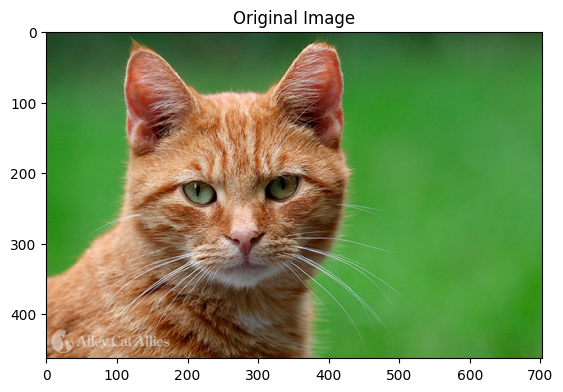

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image into a numpy array (this uses matplotlib for simplicity)
image = plt.imread('cat.jpg')
plt.imshow(image)
plt.title("Original Image")
plt.show()


**a. Flipping an Image**

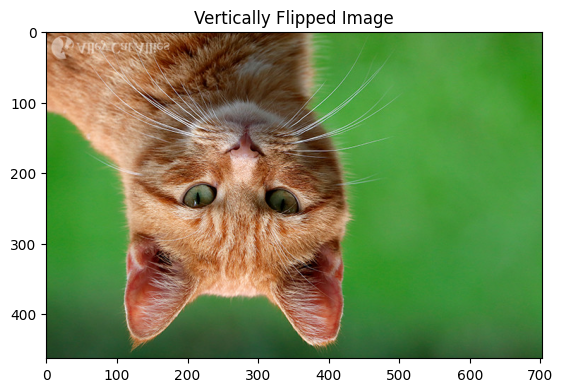

In [14]:
# Flip an image vertically
flipped_image = np.flipud(image)
plt.imshow(flipped_image)
plt.title("Vertically Flipped Image")
plt.show()


**b. Grayscale Conversion**

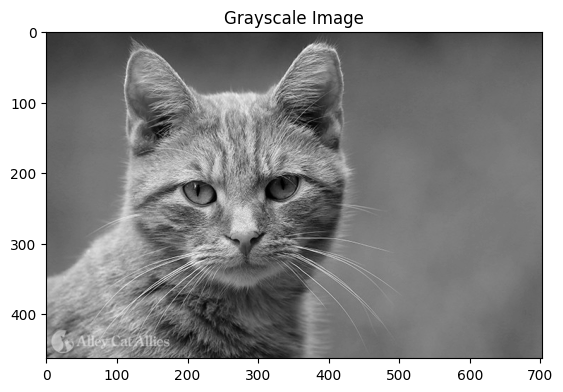

In [15]:
# Convert image to grayscale
def rgb2gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])

gray_image = rgb2gray(image)
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.show()


---

**2. Signal Processing with Numpy**

**Big Picture**: Signals (like sound waves) can be represented as a series of values (samples) over time. Numpy can help process these signals to filter noise, extract features, etc.

**a. Creating a Simple Signal**: Often used for simulation or testing. For instance, if you're designing a noise filtering algorithm, you'd first test it on a simple known signal.

**b. Adding Noise and Filtering**: 
- **Use case**: Real-world signals, like audio recordings or sensor readings, often come with unwanted interference or noise. Filtering helps in isolating the desired signal. For instance, removing electrical noise from ECG readings.

---

**a. Creating a Simple Signal**

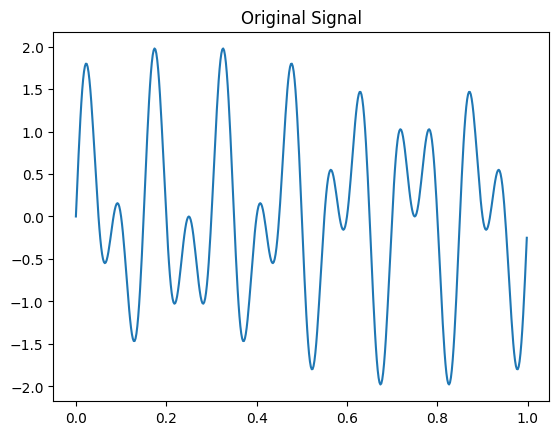

In [16]:
# Create a time array
t = np.linspace(0, 1, 500, endpoint=False)

# Create a simple signal with two frequencies
signal = np.sin(2 * np.pi * 7 * t) + np.sin(2 * np.pi * 13 * t)
plt.plot(t, signal)
plt.title("Original Signal")
plt.show()


**b. Adding Noise and Filtering**

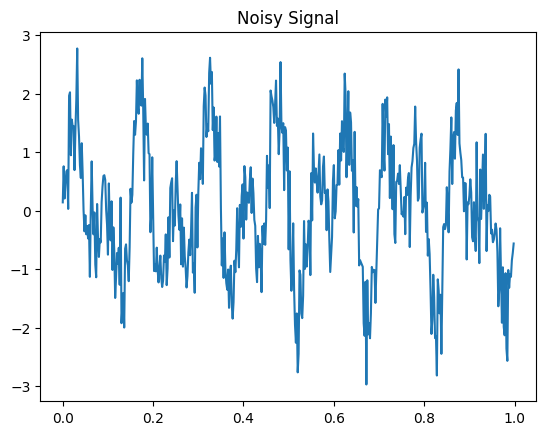

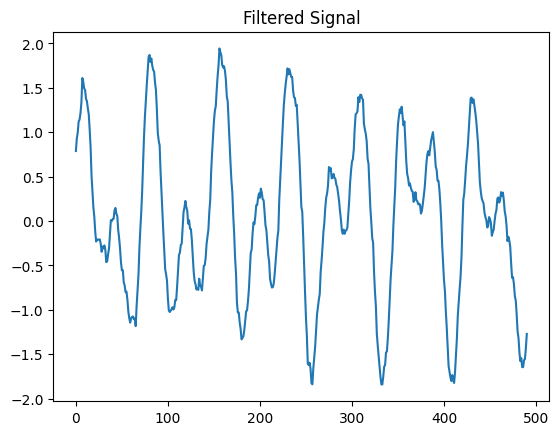

In [17]:
# Add some noise to the signal
noisy_signal = signal + 0.5 * np.random.randn(t.shape[0])
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.show()

# Filter the noise using a simple moving average
def moving_average(signal, window_size=5):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

filtered_signal = moving_average(noisy_signal, 10)
plt.plot(filtered_signal)
plt.title("Filtered Signal")
plt.show()


*Analogy:* This is like trying to listen to music with static (noise) and then using a tool to clear up that static.

---

**3. Statistical Analysis with Numpy**

**Big Picture**: Numpy provides robust statistical functions to analyze datasets, giving insights into distributions, relationships, and characteristics.

**a. Histograms**: 
- **Use case**: Whenever you need a quick visualization of data distribution. For example, if you're analyzing customer ages, a histogram can quickly show which age groups are most prevalent.
  
**b. Percentiles**: 
- **Use case**: When assessing the spread and skewness of data. For instance, in examining salaries, if the 75th percentile is only slightly higher than the median but the 25th percentile is much lower, it might indicate that there's a larger gap at the lower end of the salary spectrum.
  
**c. Correlation**: 
- **Use case**: Whenever you want to examine relationships between two datasets. For instance, to see if there's a correlation between years of experience and salary in a set of employee data.

---

**a. Histograms**

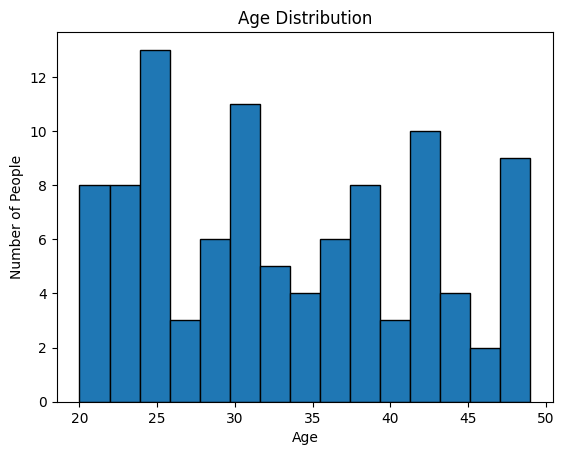

In [18]:
# Given a dataset (e.g., ages of a group of people)
data = np.random.randint(20, 50, 100)  # This is just random data for demo purposes.

# Create a histogram
plt.hist(data, bins=15, edgecolor="k")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.show()


**b. Percentiles**

In [19]:
# Calculate the 25th and 75th percentile of the data
q25, q75 = np.percentile(data, [25, 75])
print(f"25th percentile: {q25}, 75th percentile: {q75}")


25th percentile: 25.0, 75th percentile: 41.25


This gives us a sense of data spread. Middle 50% of data lies between these values.

**c. Correlation**

In [20]:
# Given two datasets (e.g., ages and salaries)
ages = np.random.randint(20, 50, 100)
salaries = np.random.randint(30000, 80000, 100) + (ages - 20) * 500  # Simulate a positive correlation

correlation_coefficient = np.corrcoef(ages, salaries)[0, 1]
print(f"Correlation coefficient between ages and salaries: {correlation_coefficient}")


Correlation coefficient between ages and salaries: 0.24846417732504053


A value near 1 indicates a strong positive correlation: as one variable increases, the other also does.

---

**4. Performance Comparison: Numpy vs Pure Python**

**Big Picture**: One of Numpy's major advantages is its speed for numerical computations compared to native Python lists.

Understanding the speed benefits of Numpy isn't just academic. 

- **Use case**: In tasks like real-time data processing, simulations, or machine learning, computational speed can be critical. If your algorithm takes too long to run with large datasets, it might be impractical for use. By comparing performance between pure Python and Numpy, you can make informed decisions on which to use based on the task's requirements.

---

**a. Sum of Squares Using Lists**

In [21]:
def sum_of_squares(values):
    return sum([x**2 for x in values])

# Time the operation
import time
values = list(range(100000))
start_time = time.time()
sum_of_squares(values)
print(f"Time using lists: {time.time() - start_time:.6f} seconds")


Time using lists: 0.005815 seconds


**b. Sum of Squares Using Numpy Arrays**

In [22]:
def numpy_sum_of_squares(values):
    return np.sum(values**2)

values_np = np.arange(100000)
start_time = time.time()
numpy_sum_of_squares(values_np)
print(f"Time using Numpy: {time.time() - start_time:.6f} seconds")


Time using Numpy: 0.000368 seconds


Typically, you'll observe that Numpy is faster, especially for large datasets or complex operations.